In [1]:
import os
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_images(images, titles):
    images_len = len(images)
    fig, ax = plt.subplots(1, len(images), figsize=(8 * images_len, 14))
    for i in range(images_len):
        image = images[i]
        if images_len == 1:
            ax.imshow(image, cmap='gray')
            ax.set_title(titles[i])
            ax.axis('off')
        else:
            ax[i].imshow(image, cmap='gray')
            ax[i].set_title(titles[i])
            ax[i].axis('off')
    plt.show()

[Reference](https://github.com/njean42/kumiko/blob/master/kumikolib.py)

In [7]:
def show_contours(file_name):
    image = cv2.imread(file_name)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.GaussianBlur(gray, (9, 9), 0)
    ret, thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
    
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    
    orig = image.copy()

    for contour in contours:
        if cv2.contourArea(contour) < 30000:
            continue
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    show_images([image, orig], ['Image', 'Image with contour'])

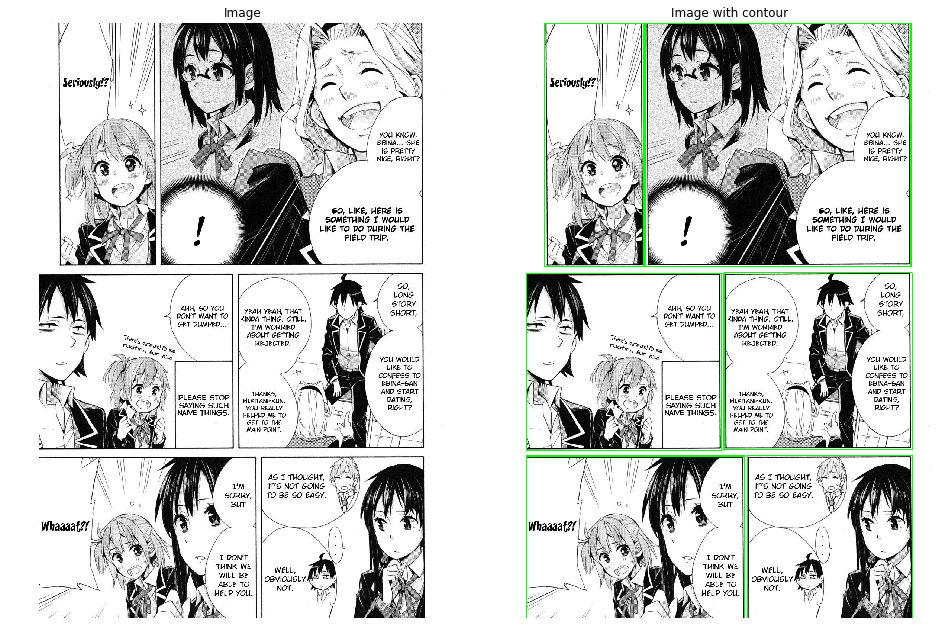

In [19]:
show_contours('dataset/027-017.jpg')